Final Project Dataset: The data is scrapped from cars24.com in month of march-2021 .Since the data is scrapped from live website ,the data is uncleaned. Detailed explanation of the site: https://www.cars24.com/faq/ Problem statement: Given the features of the car ,predict the selling price of that used car.

Features:

Independent variables

Name:Car Model name along with purchase year of the car. Rating:Rating given while car inspection by cars 24 team. City: City of that car placed for advertainment ,city is given interms of code format. Kilometres:How many kilometres that particular car has driven for before placing that advertisement . Year of purchase :Original Date of purchase of that car. Owner:How many previous owners it had before selling on cars24 site. Fuel type:Type of fuel which car runs on.(Petrol, diesel …) Transmission:whether car is automated or manual transmission. RT0: Car registered under which RTO . Insurance:expiry date of the insurance if any. Insurance_Type: Different types insurance availed by owner. Target: Price:Price of the used car. Task: Required r2score is 0.85 on test data. Split data into 80-20 percent. Apply the different regression techniques like

1.Linear regression 2.Lasso 3.Ridge 4.Polynomial 5.Decision tree 6.Random forests 7.Xgboost

Let’s load the data using Pandas. Once again you should write a small function to load the data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
Cars=pd.read_excel('cars_datafinal.xlsx')

Let’s take a look at the top five rows using the DataFrame’s head() method

In [3]:
Cars.head()

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
0,2010 Maruti Alto LXI,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired
1,2013 Maruti Wagon R 1.0 VXI,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp
2,2014 Maruti Wagon R 1.0 VXI,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp
3,2013 Hyundai Eon D LITE PLUS,"₹ 237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp
4,2017 Hyundai Eon ERA PLUS,"₹ 300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired


The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values 

In [4]:
#quick summary
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              32158 non-null  object
 1   Price             32158 non-null  object
 2   Rating            32158 non-null  object
 3   city              32158 non-null  int64 
 4   Kilometers        32158 non-null  object
 5   Year_of_Purchase  32158 non-null  object
 6   Owner             32158 non-null  object
 7   Fuel_Type         32158 non-null  object
 8   Transmission      29342 non-null  object
 9   RTO               32158 non-null  object
 10  Insurance         22965 non-null  object
 11  Insurance_Type    32158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.9+ MB


All attributes are obj, except the city field. Its type is int64.

In [5]:
#Shape of the dataset
Cars.shape

(32158, 12)

In [6]:
# the columns Names
Cars.keys()

Index(['Name', 'Price', 'Rating', 'city', 'Kilometers', 'Year_of_Purchase',
       'Owner', 'Fuel_Type', 'Transmission', 'RTO', 'Insurance',
       'Insurance_Type'],
      dtype='object')

In [7]:
#Check the missing values
Cars.isnull().sum()

Name                   0
Price                  0
Rating                 0
city                   0
Kilometers             0
Year_of_Purchase       0
Owner                  0
Fuel_Type              0
Transmission        2816
RTO                    0
Insurance           9193
Insurance_Type         0
dtype: int64

# Feautres Engineering :-

#Data Cleaning

In [8]:
##Splitting the price value only

In [9]:
Cars.Price=Cars.Price.replace({',': ''}, regex=True)

In [10]:
Cars['price']=Cars['Price'].apply(lambda p:p.split(' ')[-1])
Cars['price']=Cars['price'].astype(int)

In [11]:
Cars

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price
0,2010 Maruti Alto LXI,₹ 174699,4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired,174699
1,2013 Maruti Wagon R 1.0 VXI,₹ 333999,4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp,333999
2,2014 Maruti Wagon R 1.0 VXI,₹ 353199,4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp,353199
3,2013 Hyundai Eon D LITE PLUS,₹ 237899,4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp,237899
4,2017 Hyundai Eon ERA PLUS,₹ 300699,4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired,300699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32153,2008 Ford Fiesta 1.6 ZXI,₹ 150000,3.4out of 5,769,"Kilometers95,792 km",Year of PurchaseFebruary 2008,OwnerThird Owner,FuelPetrol,TransmissionMANUAL,RTOCH04,NaN,Insurance TypeInsurance Expired,150000
32154,2015 Chevrolet Beat LS DIESEL,₹ 250000,3.5out of 5,769,"Kilometers54,505 km",Year of PurchaseNovember 2015,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,RTOPB13,NaN,Insurance TypeInsurance Expired,250000
32155,2008 Ford Endeavour XLT TDCI 4X2,₹ 500000,3.6out of 5,769,"Kilometers161,322 km",Year of PurchaseJanuary 2008,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,RTOHR03,NaN,Insurance TypeInsurance Expired,500000
32156,2016 Maruti Swift Dzire VDI ABS,₹ 600000,4.7out of 5,769,"Kilometers52,006 km",Year of PurchaseOctober 2016,OwnerFirst Owner,FuelDiesel,NaN,RTOPB65,Insurance27/10/2019,Insurance TypeZero Depreciation,600000


In [12]:
# I want to remove (out of 5) string present in Rating column.
Cars['Rating'] = Cars['Rating'].str.replace('out of 5',"")

In [13]:
#Splitting Kilometer column


In [14]:
Cars['Kilometers'] = Cars['Kilometers'].str.replace(r'\W',"")
Cars['Kilometers'] = Cars['Kilometers'].str.replace('Kilometers',"")
Cars['Kilometers'] = Cars['Kilometers'].str.replace('km',"")

In [15]:
##Cars['Year']=Cars['Year_of_Purchase'].apply(lambda x:x.split(' ')[-1])
#Cars['Year']

In [16]:
#Removing extra year of purchase
Cars['Year_of_Purchase'] = Cars['Year_of_Purchase'].str.replace('Year of Purchase',"")

In [17]:
Cars['Year_of_Purchase'] = pd.to_datetime(Cars['Year_of_Purchase'])

#Cars['Year_of_Purchase'] = pd.to_numeric(pd.to_datetime(Cars['Year_of_Purchase']))

Cars['year'] = Cars['Year_of_Purchase'].dt.year
Cars['month'] = Cars['Year_of_Purchase'].dt.month


#Cars['Year_of_Purchase'] = Cars['Year_of_Purchase'].apply(lambda x: x.strftime('%Y-%m'))

In [18]:
#now drop the extra Year_of_Purchase column
Cars.drop(['Year_of_Purchase'], axis='columns',inplace=True)

In [19]:
Cars['Current Year']=2021

In [20]:
Cars['no_of_yr']=Cars['Current Year']-Cars['year']

In [21]:
Cars.head()

,Name,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price,year,month,Current Year,no_of_yr
0,2010 Maruti Alto LXI,₹ 174699,4,3686,34854,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired,174699,2010,5,2021,11
1,2013 Maruti Wagon R 1.0 VXI,₹ 333999,4.2,3686,39541,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp,333999,2013,7,2021,8
2,2014 Maruti Wagon R 1.0 VXI,₹ 353199,4.3,3686,23233,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp,353199,2014,3,2021,7
3,2013 Hyundai Eon D LITE PLUS,₹ 237899,4.4,3686,27748,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp,237899,2013,11,2021,8
4,2017 Hyundai Eon ERA PLUS,₹ 300699,4.4,3686,12238,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired,300699,2017,8,2021,4


In [22]:
Cars.drop(['Current Year',],axis=1,inplace=True)
Cars.head()

,Name,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price,year,month,no_of_yr
0,2010 Maruti Alto LXI,₹ 174699,4,3686,34854,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired,174699,2010,5,11
1,2013 Maruti Wagon R 1.0 VXI,₹ 333999,4.2,3686,39541,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp,333999,2013,7,8
2,2014 Maruti Wagon R 1.0 VXI,₹ 353199,4.3,3686,23233,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp,353199,2014,3,7
3,2013 Hyundai Eon D LITE PLUS,₹ 237899,4.4,3686,27748,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp,237899,2013,11,8
4,2017 Hyundai Eon ERA PLUS,₹ 300699,4.4,3686,12238,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired,300699,2017,8,4


In [23]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            32158 non-null  object
 1   Price           32158 non-null  object
 2   Rating          32158 non-null  object
 3   city            32158 non-null  int64 
 4   Kilometers      32158 non-null  object
 5   Owner           32158 non-null  object
 6   Fuel_Type       32158 non-null  object
 7   Transmission    29342 non-null  object
 8   RTO             32158 non-null  object
 9   Insurance       22965 non-null  object
 10  Insurance_Type  32158 non-null  object
 11  price           32158 non-null  int32 
 12  year            32158 non-null  int64 
 13  month           32158 non-null  int64 
 14  no_of_yr        32158 non-null  int64 
dtypes: int32(1), int64(4), object(10)
memory usage: 3.6+ MB


In [24]:
#Treating fuel_type column
Cars['Fuel_Type'] = Cars['Fuel_Type'].str.replace('Fuel',"")

Column Transmission:
    
Firstly we need to clean the column (Remove extra Transmission written by our features) or Encoded the column convert into Categorical to Numeric

In [25]:
### Removing the extra Transmission string in our column
Cars['Transmission'] = Cars['Transmission'].str.replace('Transmission',"")

In [26]:
### Removing the extra Insurance string in our column
Cars['Insurance'] = Cars['Insurance'].str.replace('Insurance',"")

In [27]:
### Removing the extra Insurance string in our column
Cars['Insurance_Type'] = Cars['Insurance_Type'].str.replace('Insurance Type',"")
Cars['Insurance_Type'] = Cars['Insurance_Type'].str.replace('Insurance',"")


### For removing space in the string
Cars['Insurance_Type'] = Cars['Insurance_Type'].str.replace(" ","")

In [28]:
#Treating Column Owner:
Cars['Owner'] = Cars['Owner'].str.replace('Owner',"")

## Column RTO

* only taking statewise RTO column.

In [29]:
Numbers = ["0",'1',"2","3","4","5","6","7","8",
              "9"]
for n in Numbers:
    Cars['RTO'] = Cars['RTO'].str.replace(n, '')

For Name Column

In [30]:
##splitting the Name column according to year model and brand name
Name_n= Cars['Name'].str.split(" ", n = 2, expand = True)
Name_n.columns = ['Launch_year','Brand', 'Model']

In [31]:
Cars.head(3)

,Name,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price,year,month,no_of_yr
0,2010 Maruti Alto LXI,₹ 174699,4,3686,34854,First,Petrol,MANUAL,RTOAP,NaN,Expired,174699,2010,5,11
1,2013 Maruti Wagon R 1.0 VXI,₹ 333999,4.2,3686,39541,Second,Petrol,MANUAL,RTOAP,6/8/2021,Comp,333999,2013,7,8
2,2014 Maruti Wagon R 1.0 VXI,₹ 353199,4.3,3686,23233,Second,Petrol,MANUAL,RTOAP,28/4/2021,Comp,353199,2014,3,7


In [32]:
Name_n.head(3)

,Launch_year,Brand,Model
0,2010,Maruti,Alto LXI
1,2013,Maruti,Wagon R 1.0 VXI
2,2014,Maruti,Wagon R 1.0 VXI


In [33]:
Name_n['Brand'] = Name_n['Brand'].str.lower()
Name_n['Model'] = Name_n['Model'].str.lower()
print(Name_n['Brand'].unique())
print(Name_n['Model'].unique())

['maruti' 'hyundai' 'honda' 'chevrolet' 'ford' 'renault' 'volkswagen'
 'tata' 'mahindra' 'toyota' 'datsun' 'mitsubishi' 'nissan' 'kia' 'fiat'
 'skoda' 'opel' 'mg' 'volvo' 'jeep' 'mercedes' 'ssangyong' 'bmw' 'audi'
 'daewoo' 'jaguar' 'landrover' 'force' 'isuzu' 'porsche' 'premier'
 'hindustan' 'icml']
['alto lxi' 'wagon r 1.0 vxi' 'eon d lite plus' ...
 'scorpio vlx at bs iii' 'baleno rs 1.0' 'ciaz s 1.4']


In [34]:
Name_n.drop(['Launch_year'],axis=1)

,Brand,Model
0,maruti,alto lxi
1,maruti,wagon r 1.0 vxi
2,maruti,wagon r 1.0 vxi
3,hyundai,eon d lite plus
4,hyundai,eon era plus
...,...,...
32153,ford,fiesta 1.6 zxi
32154,chevrolet,beat ls diesel
32155,ford,endeavour xlt tdci 4x2
32156,maruti,swift dzire vdi abs


In [35]:
#now put new columns into original dataframe
Car_data=pd.concat([Cars,Name_n],axis=1)
Car_data.drop(['Name'],axis=1)

,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price,year,month,no_of_yr,Launch_year,Brand,Model
0,₹ 174699,4,3686,34854,First,Petrol,MANUAL,RTOAP,NaN,Expired,174699,2010,5,11,2010,maruti,alto lxi
1,₹ 333999,4.2,3686,39541,Second,Petrol,MANUAL,RTOAP,6/8/2021,Comp,333999,2013,7,8,2013,maruti,wagon r 1.0 vxi
2,₹ 353199,4.3,3686,23233,Second,Petrol,MANUAL,RTOAP,28/4/2021,Comp,353199,2014,3,7,2014,maruti,wagon r 1.0 vxi
3,₹ 237899,4.4,3686,27748,First,Petrol,MANUAL,RTOAP,1/1/2022,Comp,237899,2013,11,8,2013,hyundai,eon d lite plus
4,₹ 300699,4.4,3686,12238,Second,Petrol,MANUAL,RTOTS,NaN,Expired,300699,2017,8,4,2017,hyundai,eon era plus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32153,₹ 150000,3.4,769,95792,Third,Petrol,MANUAL,RTOCH,NaN,Expired,150000,2008,2,13,2008,ford,fiesta 1.6 zxi
32154,₹ 250000,3.5,769,54505,Second,Diesel,MANUAL,RTOPB,NaN,Expired,250000,2015,11,6,2015,chevrolet,beat ls diesel
32155,₹ 500000,3.6,769,161322,Second,Diesel,MANUAL,RTOHR,NaN,Expired,500000,2008,1,13,2008,ford,endeavour xlt tdci 4x2
32156,₹ 600000,4.7,769,52006,First,Diesel,NaN,RTOPB,27/10/2019,ZeroDepreciation,600000,2016,10,5,2016,maruti,swift dzire vdi abs


In [36]:
pd.set_option('display.max_columns', None)


In [37]:
pd.set_option('display.max_columns', None)
Car_data.head(3)

,Name,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price,year,month,no_of_yr,Launch_year,Brand,Model
0,2010 Maruti Alto LXI,₹ 174699,4,3686,34854,First,Petrol,MANUAL,RTOAP,NaN,Expired,174699,2010,5,11,2010,maruti,alto lxi
1,2013 Maruti Wagon R 1.0 VXI,₹ 333999,4.2,3686,39541,Second,Petrol,MANUAL,RTOAP,6/8/2021,Comp,333999,2013,7,8,2013,maruti,wagon r 1.0 vxi
2,2014 Maruti Wagon R 1.0 VXI,₹ 353199,4.3,3686,23233,Second,Petrol,MANUAL,RTOAP,28/4/2021,Comp,353199,2014,3,7,2014,maruti,wagon r 1.0 vxi


In [38]:
Car_data.to_csv('Cars24filtered.csv',index=False,)

# *********Saving the filtered dataset**********############

# Now start work with new filtered data set

In [39]:
# Importing all the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)


In [40]:
Car_Data=pd.read_csv('Cars24filtered.csv')

In [41]:
Carfinal=Car_Data.drop(['Price','Name','Launch_year'],axis=1)
Carfinal.head()

,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,price,year,month,no_of_yr,Brand,Model
0,4.0,3686,34854,First,Petrol,MANUAL,RTOAP,NaN,Expired,174699,2010,5,11,maruti,alto lxi
1,4.2,3686,39541,Second,Petrol,MANUAL,RTOAP,6/8/2021,Comp,333999,2013,7,8,maruti,wagon r 1.0 vxi
2,4.3,3686,23233,Second,Petrol,MANUAL,RTOAP,28/4/2021,Comp,353199,2014,3,7,maruti,wagon r 1.0 vxi
3,4.4,3686,27748,First,Petrol,MANUAL,RTOAP,1/1/2022,Comp,237899,2013,11,8,hyundai,eon d lite plus
4,4.4,3686,12238,Second,Petrol,MANUAL,RTOTS,NaN,Expired,300699,2017,8,4,hyundai,eon era plus


In [42]:
Carfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          32158 non-null  float64
 1   city            32158 non-null  int64  
 2   Kilometers      32158 non-null  int64  
 3   Owner           32158 non-null  object 
 4   Fuel_Type       32158 non-null  object 
 5   Transmission    29342 non-null  object 
 6   RTO             32158 non-null  object 
 7   Insurance       22965 non-null  object 
 8   Insurance_Type  32156 non-null  object 
 9   price           32158 non-null  int64  
 10  year            32158 non-null  int64  
 11  month           32158 non-null  int64  
 12  no_of_yr        32158 non-null  int64  
 13  Brand           32158 non-null  object 
 14  Model           32158 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 3.7+ MB


In [43]:
Carfinal.shape

(32158, 15)

In [44]:
Carfinal.keys()

Index(['Rating', 'city', 'Kilometers', 'Owner', 'Fuel_Type', 'Transmission',
       'RTO', 'Insurance', 'Insurance_Type', 'price', 'year', 'month',
       'no_of_yr', 'Brand', 'Model'],
      dtype='object')

# EDA Part


In [45]:
###We have to find out which company sells more no.of cars.

In [46]:
Carfinal['Brand'].unique()

array(['maruti', 'hyundai', 'honda', 'chevrolet', 'ford', 'renault',
       'volkswagen', 'tata', 'mahindra', 'toyota', 'datsun', 'mitsubishi',
       'nissan', 'kia', 'fiat', 'skoda', 'opel', 'mg', 'volvo', 'jeep',
       'mercedes', 'ssangyong', 'bmw', 'audi', 'daewoo', 'jaguar',
       'landrover', 'force', 'isuzu', 'porsche', 'premier', 'hindustan',
       'icml'], dtype=object)

<AxesSubplot:title={'center':'Cars sold per company'}, xlabel='Brand Name', ylabel='No. of cars sold'>

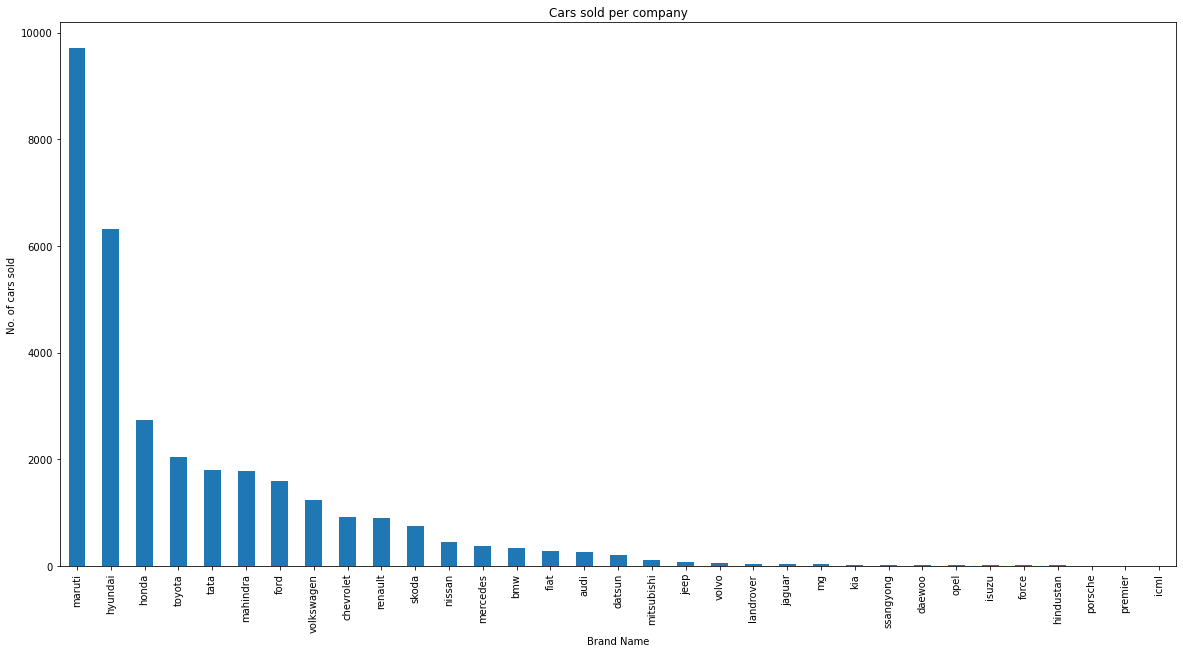

In [47]:
plt.figure(figsize=(20,10))
plt.xlabel('Brand Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per company')
Carfinal['Brand'].value_counts().plot(kind='bar')

**From the graph we find that Brand Maruti solds more no. of cars.

<AxesSubplot:title={'center':'Cars Purchased pre year'}, xlabel='year', ylabel='No. of cars '>

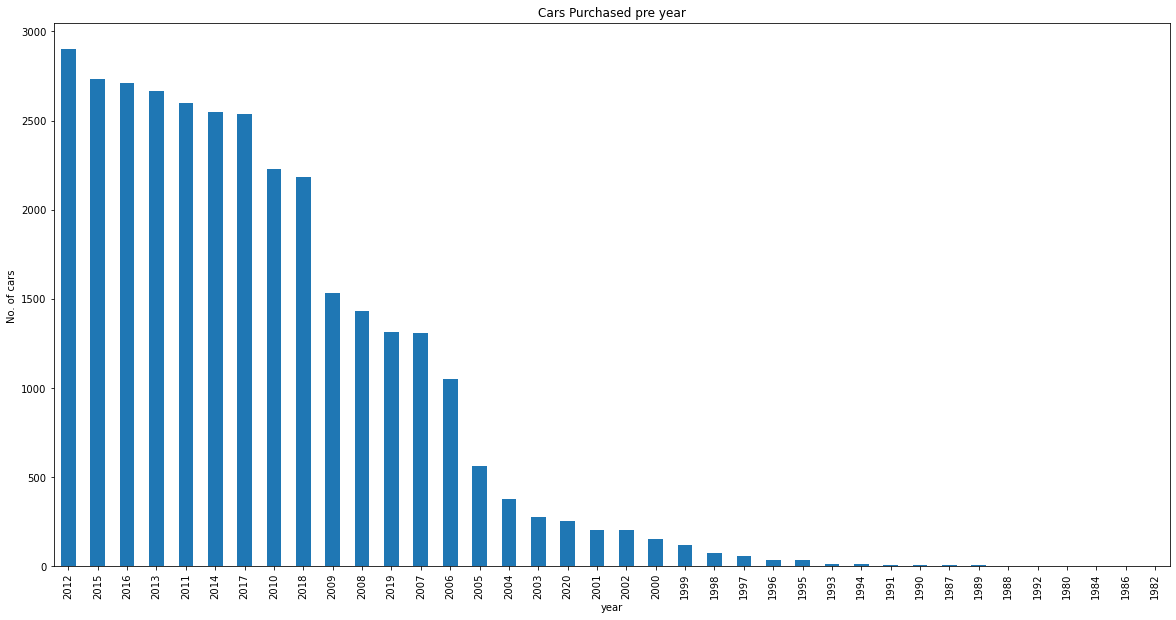

In [48]:
###What is the no.of cars purchased per year???
plt.figure(figsize=(20,10))
plt.xlabel('year')
plt.ylabel('No. of cars ')
plt.title('Cars Purchased pre year')
Carfinal['year'].value_counts().plot.bar()

In [49]:
###What is the average price for each Brand???
price_m = Carfinal.groupby('Brand').price.mean()
price_m

Brand
audi          1.573726e+06
bmw           1.518635e+06
chevrolet     2.036165e+05
daewoo        3.356429e+04
datsun        2.834298e+05
fiat          2.426789e+05
force         4.041773e+05
ford          3.975448e+05
hindustan     1.059444e+05
honda         4.712408e+05
hyundai       4.172228e+05
icml          7.000000e+04
isuzu         1.319492e+06
jaguar        2.637736e+06
jeep          1.638579e+06
kia           1.801115e+06
landrover     2.476015e+06
mahindra      6.031117e+05
maruti        3.723931e+05
mercedes      1.651188e+06
mg            1.772836e+06
mitsubishi    5.679133e+05
nissan        3.911729e+05
opel          6.038462e+04
porsche       3.257040e+06
premier       1.600000e+05
renault       4.569121e+05
skoda         4.734462e+05
ssangyong     7.099384e+05
tata          2.974841e+05
toyota        7.517195e+05
volkswagen    4.641221e+05
volvo         1.672766e+06
Name: price, dtype: float64

<AxesSubplot:title={'center':'Average price of cars per Brand'}, xlabel='Brand', ylabel='Average price (in lacs) in rupees'>

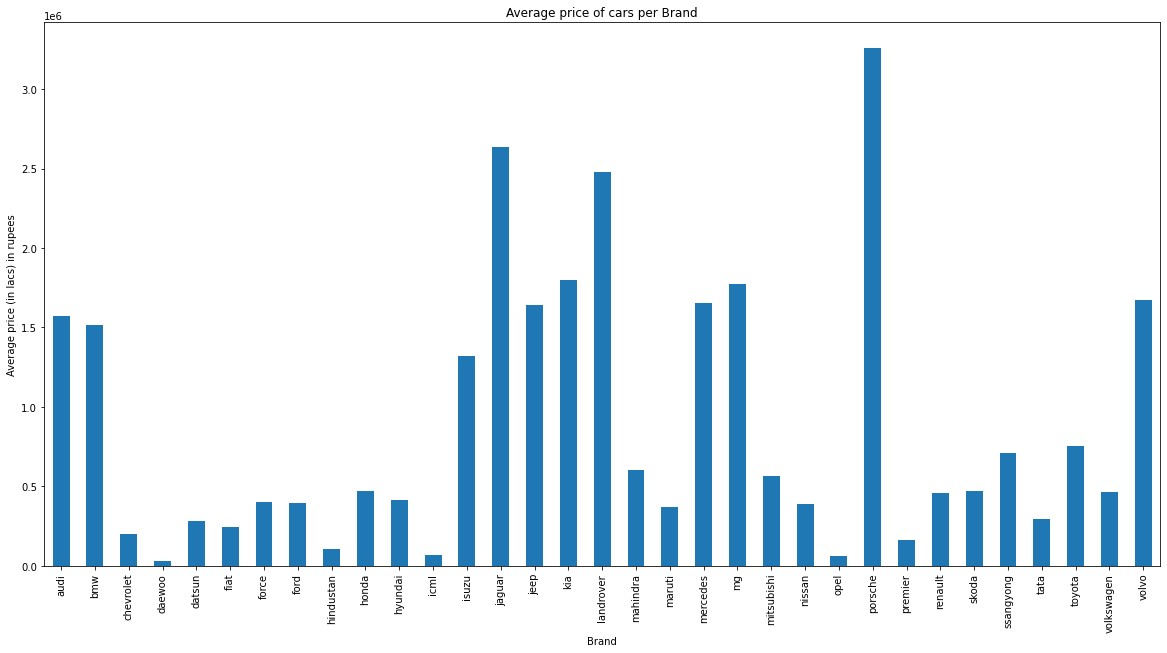

In [50]:
plt.figure(figsize=(20,10))
plt.xlabel('Brand Name')
plt.ylabel('Average price (in lacs) in rupees')
price_m.plot(kind='bar', title = 'Average price of cars per Brand')

In [51]:
#Finding the Average kilometres with respect to brands to know after how much km driving one person like to sell the car.
km = Carfinal.groupby('Brand').Kilometers.mean()

<AxesSubplot:title={'center':'km_driven vs company plot'}, xlabel='Brand', ylabel='Average km_driven'>

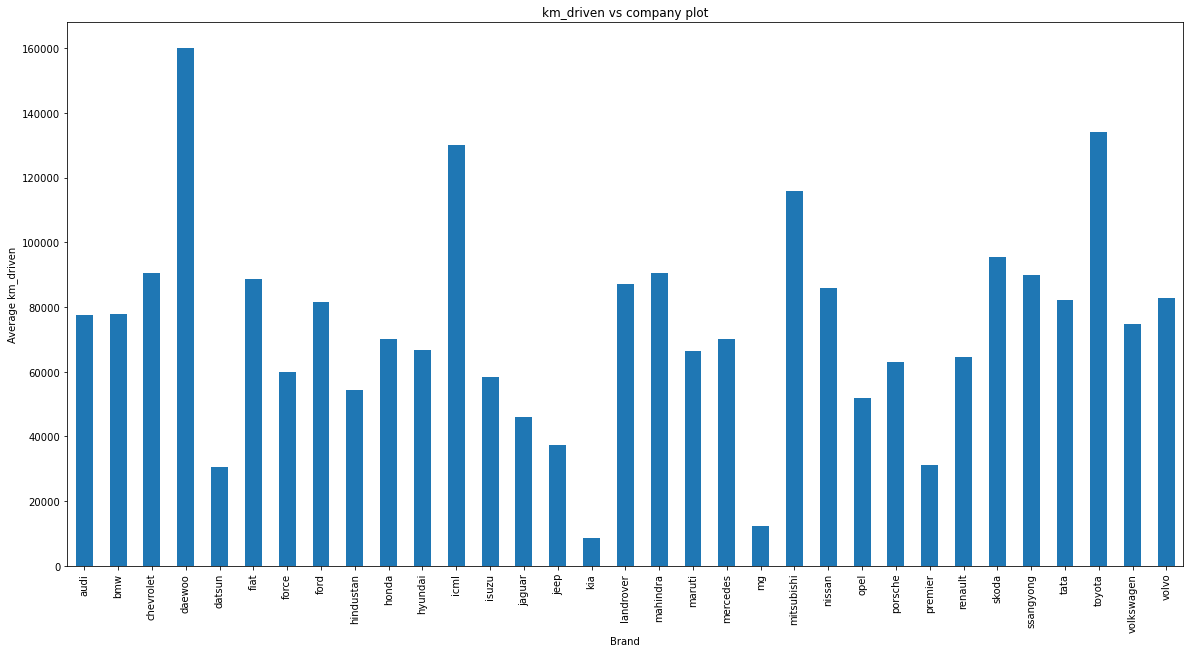

In [52]:
plt.figure(figsize=(20,10))
plt.xlabel('Brand Name')
plt.ylabel('Average km_driven')
km.plot(kind='bar', title = 'km_driven vs company plot')

In [53]:
###Missing value computation
Carfinal.isnull().sum()

Rating               0
city                 0
Kilometers           0
Owner                0
Fuel_Type            0
Transmission      2816
RTO                  0
Insurance         9193
Insurance_Type       2
price                0
year                 0
month                0
no_of_yr             0
Brand                0
Model                0
dtype: int64

From above anlysis we found column Transmission,Insurance have high no. missing values and Insurance_Type has only 2 missing values.

In [54]:
Carfinal.Transmission.unique()

array(['MANUAL', nan, 'AUTOMATIC'], dtype=object)

In [55]:
Carfinal.Insurance_Type.unique()

array(['Expired', 'Comp', 'Third_party', 'Zero_Dep', nan,
       'ZeroDepreciation', '3rdParty', 'Comprehensive', 'NotAvailable',
       'Normal'], dtype=object)

In [56]:
from sklearn.impute import SimpleImputer

S_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
Carfinal['Transmission'] = pd.DataFrame(S_imputer.fit_transform(Carfinal[['Transmission']]))
Carfinal['Insurance_Type'] = pd.DataFrame(S_imputer.fit_transform(Carfinal[['Insurance_Type']]))

In [57]:
Carfinal.Transmission.unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [58]:
Carfinal.Insurance_Type.unique()

array(['Expired', 'Comp', 'Third_party', 'Zero_Dep', 'ZeroDepreciation',
       '3rdParty', 'Comprehensive', 'NotAvailable', 'Normal'],
      dtype=object)

In [59]:
###Droping the Insurance column as there is no such method for date column
Carfinal.drop(['Insurance'],axis=1,inplace = True)

In [60]:
Carfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          32158 non-null  float64
 1   city            32158 non-null  int64  
 2   Kilometers      32158 non-null  int64  
 3   Owner           32158 non-null  object 
 4   Fuel_Type       32158 non-null  object 
 5   Transmission    32158 non-null  object 
 6   RTO             32158 non-null  object 
 7   Insurance_Type  32158 non-null  object 
 8   price           32158 non-null  int64  
 9   year            32158 non-null  int64  
 10  month           32158 non-null  int64  
 11  no_of_yr        32158 non-null  int64  
 12  Brand           32158 non-null  object 
 13  Model           32158 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 3.4+ MB


In [61]:
Carfinal.isnull().sum()

Rating            0
city              0
Kilometers        0
Owner             0
Fuel_Type         0
Transmission      0
RTO               0
Insurance_Type    0
price             0
year              0
month             0
no_of_yr          0
Brand             0
Model             0
dtype: int64

#Now work for Insurance_Type column

In [62]:
Carfinal.Insurance_Type.unique()

array(['Expired', 'Comp', 'Third_party', 'Zero_Dep', 'ZeroDepreciation',
       '3rdParty', 'Comprehensive', 'NotAvailable', 'Normal'],
      dtype=object)

In [63]:
# Naming the duplicate string 
Carfinal["Insurance_Type"]=Carfinal["Insurance_Type"].str.replace('Comp', 'Comprehensive')
Carfinal["Insurance_Type"]=Carfinal["Insurance_Type"].str.replace('Zero_Dep', 'ZeroDepreciation')
Carfinal["Insurance_Type"]=Carfinal["Insurance_Type"].str.replace('3rdParty', 'Third_party')
Carfinal["Insurance_Type"]=Carfinal["Insurance_Type"].str.replace('NotAvailable', 'Expired')


In [64]:
#Now let's see the new data
Carfinal.Insurance_Type.unique()

array(['Expired', 'Comprehensive', 'Third_party', 'ZeroDepreciation',
       'Comprehensiverehensive', 'Normal'], dtype=object)

In [65]:
Carfinal["Insurance_Type"]=Carfinal["Insurance_Type"].str.replace('Comprehensiverehensive', 'Comprehensive')
Carfinal["Insurance_Type"]=Carfinal["Insurance_Type"].str.replace('Comprehensiverehensiverehensive', 'Comprehensive')


In [66]:
Carfinal.Insurance_Type.unique()

array(['Expired', 'Comprehensive', 'Third_party', 'ZeroDepreciation',
       'Normal'], dtype=object)

In [67]:
Carfinal.Insurance_Type.value_counts()

Comprehensive       11801
Expired              9428
Third_party          6290
ZeroDepreciation     4634
Normal                  5
Name: Insurance_Type, dtype: int64

In [68]:
# let's have a look at how many labels in every columns
columns = ['Owner','Fuel_Type','Transmission','RTO','Insurance_Type','Brand','Model']

for col in columns:
    print(col, ': ', len(Carfinal[col].unique()), 'labels')

Owner :  10 labels
Fuel_Type :  6 labels
Transmission :  2 labels
RTO :  86 labels
Insurance_Type :  5 labels
Brand :  33 labels
Model :  2671 labels


In [69]:
## Droping RTO column
car=Carfinal.drop(['RTO'],axis=1)
car.head(5)

,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,Insurance_Type,price,year,month,no_of_yr,Brand,Model
0,4.0,3686,34854,First,Petrol,MANUAL,Expired,174699,2010,5,11,maruti,alto lxi
1,4.2,3686,39541,Second,Petrol,MANUAL,Comprehensive,333999,2013,7,8,maruti,wagon r 1.0 vxi
2,4.3,3686,23233,Second,Petrol,MANUAL,Comprehensive,353199,2014,3,7,maruti,wagon r 1.0 vxi
3,4.4,3686,27748,First,Petrol,MANUAL,Comprehensive,237899,2013,11,8,hyundai,eon d lite plus
4,4.4,3686,12238,Second,Petrol,MANUAL,Expired,300699,2017,8,4,hyundai,eon era plus


In [70]:
from sklearn.preprocessing import LabelEncoder

Owner_le = LabelEncoder()
Fuel_Type_le = LabelEncoder()
Transmission_le = LabelEncoder()
Insurance_Type_le = LabelEncoder()
Brand_le = LabelEncoder()
Model_le = LabelEncoder()


car['Owner'] = Owner_le.fit_transform(car['Owner'])
car['Fuel_Type'] = Fuel_Type_le.fit_transform(car['Fuel_Type'])
car['Transmission'] = Transmission_le.fit_transform(car['Transmission'])
car['Insurance_Type'] = Insurance_Type_le.fit_transform(car['Insurance_Type'])
car['Brand'] = Brand_le.fit_transform(car['Brand'])
car['Model'] = Model_le.fit_transform(car['Model'])


In [71]:
car.head()

,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,Insurance_Type,price,year,month,no_of_yr,Brand,Model
0,4.0,3686,34854,2,3,1,1,174699,2010,5,11,18,142
1,4.2,3686,39541,5,3,1,0,333999,2013,7,8,18,2470
2,4.3,3686,23233,5,3,1,0,353199,2014,3,7,18,2470
3,4.4,3686,27748,2,3,1,0,237899,2013,11,8,10,776
4,4.4,3686,12238,5,3,1,1,300699,2017,8,4,10,780


C:\Users\SAMSUNG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers'>

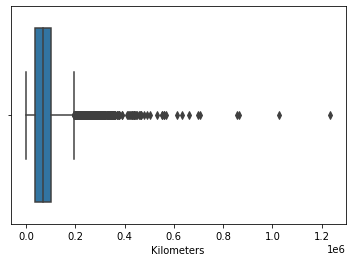

In [72]:
#car['Kilometers'] = pd.to_numeric(car.Kilometers)
sns.boxplot(car.Kilometers)

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


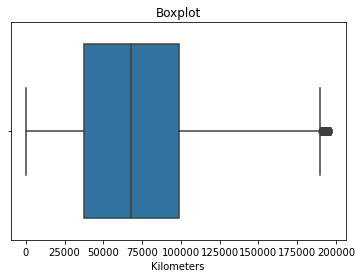

In [73]:
###Q3 = data['Kilometers'].quantile(0.75)
##IQR = Q3 - Q1
###((data['Kilometers'] < (Q1 - 1.5 * IQR)) | (data['Kilometers'] > (Q3 + 1.5 * IQR))).mean()

######mask = (data['Kilometers'] < (Q1 - 1.5 * IQR)) | (data['Kilometers'] > (Q3 + 1.5 * IQR))data  [mask] = np.nan
IQR = car['Kilometers'].quantile(0.75) - car['Kilometers'].quantile(0.25)
lower_limit = car['Kilometers'].quantile(0.25) - (IQR * 1.5)
upper_limit = car['Kilometers'].quantile(0.75) + (IQR * 1.5)
#lower_limit,upper_limit
((car['Kilometers'] < lower_limit )| (car['Kilometers'] > upper_limit)).mean()
mask = (car['Kilometers'] < lower_limit )| (car['Kilometers'] > upper_limit)
car[mask] = np.nan
sns.boxplot(car.Kilometers)
plt.title('Boxplot')
plt.show()


In [74]:
car['Kilometers']= pd.DataFrame(np.where(car['Kilometers'] > upper_limit, upper_limit,np.where(car['Kilometers'] < lower_limit, lower_limit, car['Kilometers'])))


In [75]:
car.Kilometers.min()

1.0

In [76]:
car.Kilometers.max()

196318.0

In [77]:
car.isnull().mean()

Rating            0.026028
city              0.026028
Kilometers        0.026028
Owner             0.026028
Fuel_Type         0.026028
Transmission      0.026028
Insurance_Type    0.026028
price             0.026028
year              0.026028
month             0.026028
no_of_yr          0.026028
Brand             0.026028
Model             0.026028
dtype: float64

In [78]:
car.dropna(axis=0,inplace=True)

In [79]:
car.isnull().mean()

Rating            0.0
city              0.0
Kilometers        0.0
Owner             0.0
Fuel_Type         0.0
Transmission      0.0
Insurance_Type    0.0
price             0.0
year              0.0
month             0.0
no_of_yr          0.0
Brand             0.0
Model             0.0
dtype: float64

In [80]:
###Let's see the Skewness
car.skew()

Rating           -2.399242
city              0.218477
Kilometers        0.533475
Owner             1.364083
Fuel_Type        -0.016106
Transmission     -2.949542
Insurance_Type    0.567147
price             4.497165
year             -0.912811
month             0.205311
no_of_yr          0.912811
Brand             0.259559
Model             0.063105
dtype: float64

In [81]:
car['price'] = np.log(car['price']+1)

In [82]:
from scipy import stats
car['Rating'],param = stats.boxcox(car['Rating']+1)

In [83]:
car.skew()

Rating           -0.018623
city              0.218477
Kilometers        0.533475
Owner             1.364083
Fuel_Type        -0.016106
Transmission     -2.949542
Insurance_Type    0.567147
price            -0.494860
year             -0.912811
month             0.205311
no_of_yr          0.912811
Brand             0.259559
Model             0.063105
dtype: float64

In [84]:
## Assigning the Dependent or Independent Features
X = car.drop('price',axis=1)
y = car.price


In [85]:
#Train | Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@Modeling@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [89]:
 #  Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred_train = linear_reg.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7243058261829014

In [94]:
y_pred_linear_reg = linear_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_linear_reg)

0.7022872601626808

In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.70228726, 0.72570391, 0.71913671, 0.72828251, 0.73025932])

# Find best model using GridSearchCV


In [92]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.721134,{'normalize': False}
1,lasso,0.496292,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.823456,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [98]:
 #  Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)


LinearRegression()

In [99]:
y_pred_poly = regressor.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_poly)

0.7298293423148019

In [100]:
from sklearn.linear_model import Ridge
lr_rid = Ridge()
lr_rid.fit(X_train,y_train)
lr_rid.score(X_test,y_test)
y_pre = lr_rid.predict(X_train)
y_pred = lr_rid.predict(X_test)
y_train_pred=lr_rid.predict(X_train)
y_test_pred=lr_rid.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,y_test_pred))
print("R2 score : %.2f" % r2_score(y_train,y_train_pred))

R2 score : 0.70
R2 score : 0.72


In [108]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=110,random_state=1)
regr.fit(X_train,y_train)
y_train_pred=regr.predict(X_train)
y_test_pred=regr.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,y_test_pred))
print("R2 score : %.2f" % r2_score(y_train,y_train_pred))

R2 score : 0.89
R2 score : 0.99


# Wrong model

In [117]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gr_m = GradientBoostingRegressor(n_estimators=247, max_depth=6, learning_rate=0.3)
gr_m.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=6, n_estimators=247)

In [118]:
y_pred_g_train = gr_m.predict(X_train)
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_train,y_pred_g_train))


R2 score : 1.00


In [119]:
y_pred_gb = gr_m.predict(X_test)
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred_gb))

R2 score : 0.23


# XGBOOST REGRESSOR

In [120]:
import xgboost

In [121]:
## Assigning the Dependent or Independent Features
X = car.drop('price',axis=1)
y = car.price


In [122]:
#Train | Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [123]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
model.fit(X, y)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,y_test_pred))
print("R2 score : %.2f" % r2_score(y_train,y_train_pred))

Mean MAE: 0.154 (0.003)
R2 score : 0.95
R2 score : 0.96


In [ ]:
## XGB Regressor Hyper-Parameter tunning

In [ ]:
#param_grid = {
 #       'learning_rate': [0.01, 0.1],
  #      'max_depth': [3, 5, 7, 10],
   #     'min_child_weight': [1, 3, 5],
    #    'subsample': [0.5, 0.7],
 #       'colsample_bytree': [0.5, 0.7],
  #      'n_estimators' : [100, 200, 500],
   #     'objective': ['reg:squarederror']
 #}

In [ ]:
#xgbr = XGBRegressor()

In [ ]:
#xgbr_g_search = GridSearchCV(estimator = xgbr,
 #                          param_grid = param_grid,                        
  #                         scoring = 'neg_mean_squared_error',
   #                        cv = 5,
    #                       n_jobs = -1,
     #                      verbose = 1)
#xgbr_g_search.fit(X_train, y_train)

In [ ]:
#xgbr_g_search.best_params_